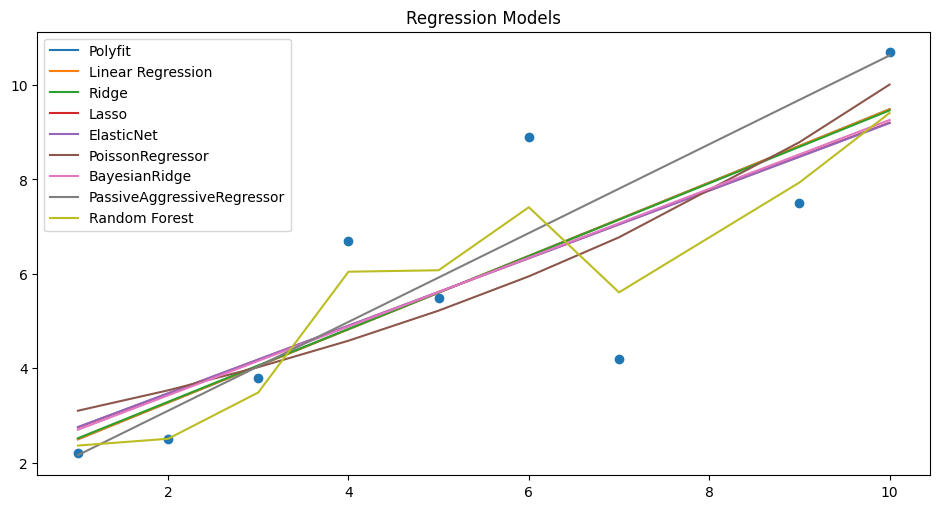

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, PoissonRegressor, BayesianRidge, PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor

# Sample data points
x = np.array([1, 2, 3, 4, 5, 6, 7, 9, 10]).reshape((-1, 1))
y = np.array([2.2, 2.5, 3.8, 6.7, 5.5, 8.9, 4.2, 7.5, 10.7])

# Create models and fit the data
models = {
    'Polyfit': np.polyfit(x.flatten(), y, 1),
    'Linear Regression': LinearRegression().fit(x, y),
    'Ridge': Ridge(0.5).fit(x, y),
    'Lasso': Lasso(0.5).fit(x, y),
    'ElasticNet': ElasticNet(0.6).fit(x, y),
    'PoissonRegressor': PoissonRegressor().fit(x, y),
    'BayesianRidge': BayesianRidge().fit(x, y),
    'PassiveAggressiveRegressor': PassiveAggressiveRegressor().fit(x, y),
    'Random Forest': RandomForestRegressor().fit(x, y),
}

# Create the plot
fig, ax = plt.subplots()

# Plot the data points and the regression lines
ax.scatter(x, y)

for name, model in models.items():
    if name == 'Polyfit':
        ax.plot(x, model[0] * x.flatten() + model[1], label=name)
    elif name == 'LogisticRegression':
        ax.plot(x, model.predict_proba(x)[:,1], label=name)
    else:
        ax.plot(x, model.predict(x), label=name)

ax.legend(loc='upper left')
# Resize the figure to make room for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.8, box.height * 1.2])

ax.set_title('Regression Models')
plt.show()



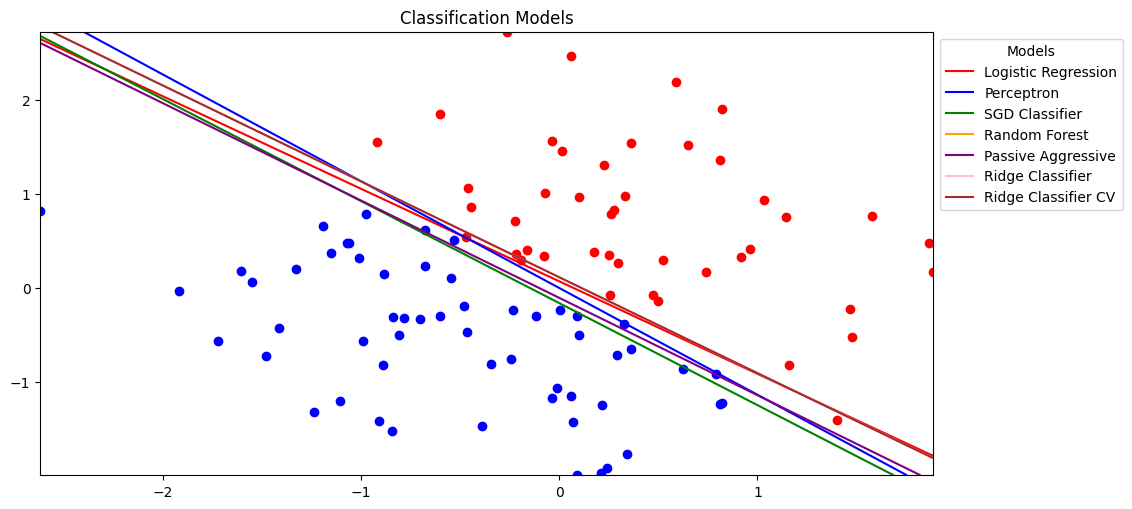

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

# Generate data points with two classes
np.random.seed(42)
x = np.random.randn(100, 2)
y = (x[:, 0] + x[:, 1] > 0).astype(int)

# Create models and fit the data
models = {
    'Logistic Regression': LogisticRegression().fit(x, y),
    'Perceptron': Perceptron().fit(x, y),
    'SGD Classifier': SGDClassifier().fit(x, y),
    'Random Forest': RandomForestClassifier().fit(x, y),
    'Passive Aggressive': PassiveAggressiveClassifier().fit(x, y),
    'Ridge Classifier': RidgeClassifier().fit(x, y),
}

# Define colors for each model
colors = {
    'Logistic Regression': 'red',
    'Perceptron': 'blue',
    'SGD Classifier': 'green',
    'Random Forest': 'orange',
    'Passive Aggressive': 'purple',
    'Ridge Classifier': 'pink',
    'Ridge Classifier CV': 'brown',
}

# Create the plot
fig, ax = plt.subplots()

# Plot the data points and the classification lines
for i, color in zip(np.unique(y), ['blue', 'red']):
    ax.scatter(x[:, 0][y==i], x[:, 1][y==i], color=color)

for name, model in models.items():
    xx, yy = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 100),
                         np.linspace(x[:, 1].min(), x[:, 1].max(), 100))
    if name == 'Random Forest':
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors=colors[name], levels=[0])

    ax.plot([], [], color=colors[name], label=name)

ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), title='Models')
# Resize the figure to make room for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.8, box.height * 1.2])

ax.set_title('Classification Models')
plt.show()
